In [1]:
# Pandas library in python is used to read in the csv file.
import pandas as pd
# Numpy library for numerical computaions
import numpy as np
# Seaborn, Matplotlib for graphs and plots to gets insights of data
import seaborn as sns
import matplotlib.pyplot as plt
# Split data into testing and training data using sklearn's model_selecion module
from sklearn.model_selection import train_test_split
# Different evaluation matrices import from sklearn.metrices
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# Creates a pandas dataframe and assigns it to the df variable.
df = pd.read_csv("data.csv")

In [3]:
#shape command gives number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
df.shape

(569, 33)

In [4]:
# Describe gives statistical information about numerical columns in the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
# Print the first 5 rows of the dataframe.
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


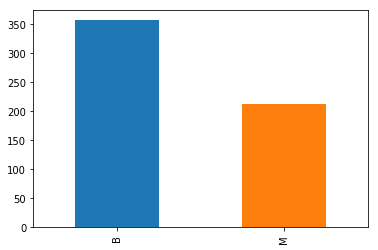

In [7]:
# Understanfing the frequency distribution of data in target variable "diagnosis"
df.diagnosis.value_counts().plot(kind="bar")

In [8]:
# Frequency of unique values of target variable
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
# Mapping string value feature to numerical value feature using map function
cancer_mapping = {'B':0, 'M':1}
df.diagnosis = df.diagnosis.map(cancer_mapping)

In [10]:
# Checking if any duplicates in "id" column by finding unique values and if their frequency is greater than 1
df.id.value_counts().unique()

array([1])

In [11]:
# Since "id" column has no direct impact on target value (just patient id or index)
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [12]:
# Names of columns in the df
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
# Checking if any duplicate values in the df
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
559    False
560    False
561    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [14]:
# To check presence of missing (NaN) values
df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1609ebfba8>,
      dtype=object)

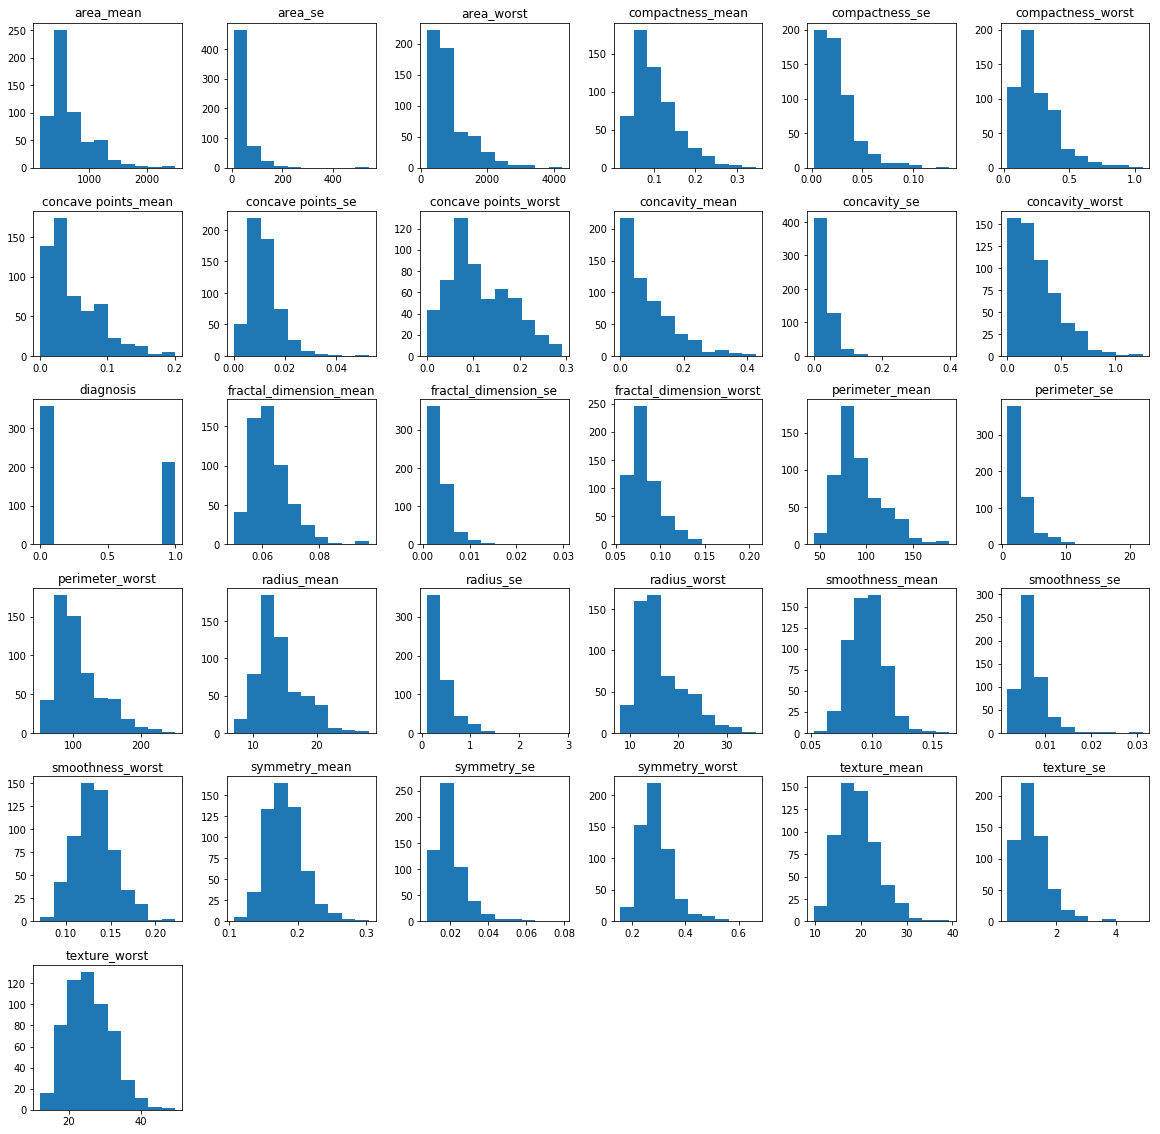

In [15]:
# Getting insight of data distribution based on frequency of unique values in the features
df.hist(bins=10,figsize=(20,20),grid=False)

##  High correlational value features with repect to target variable

In [16]:
y = df['diagnosis']
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

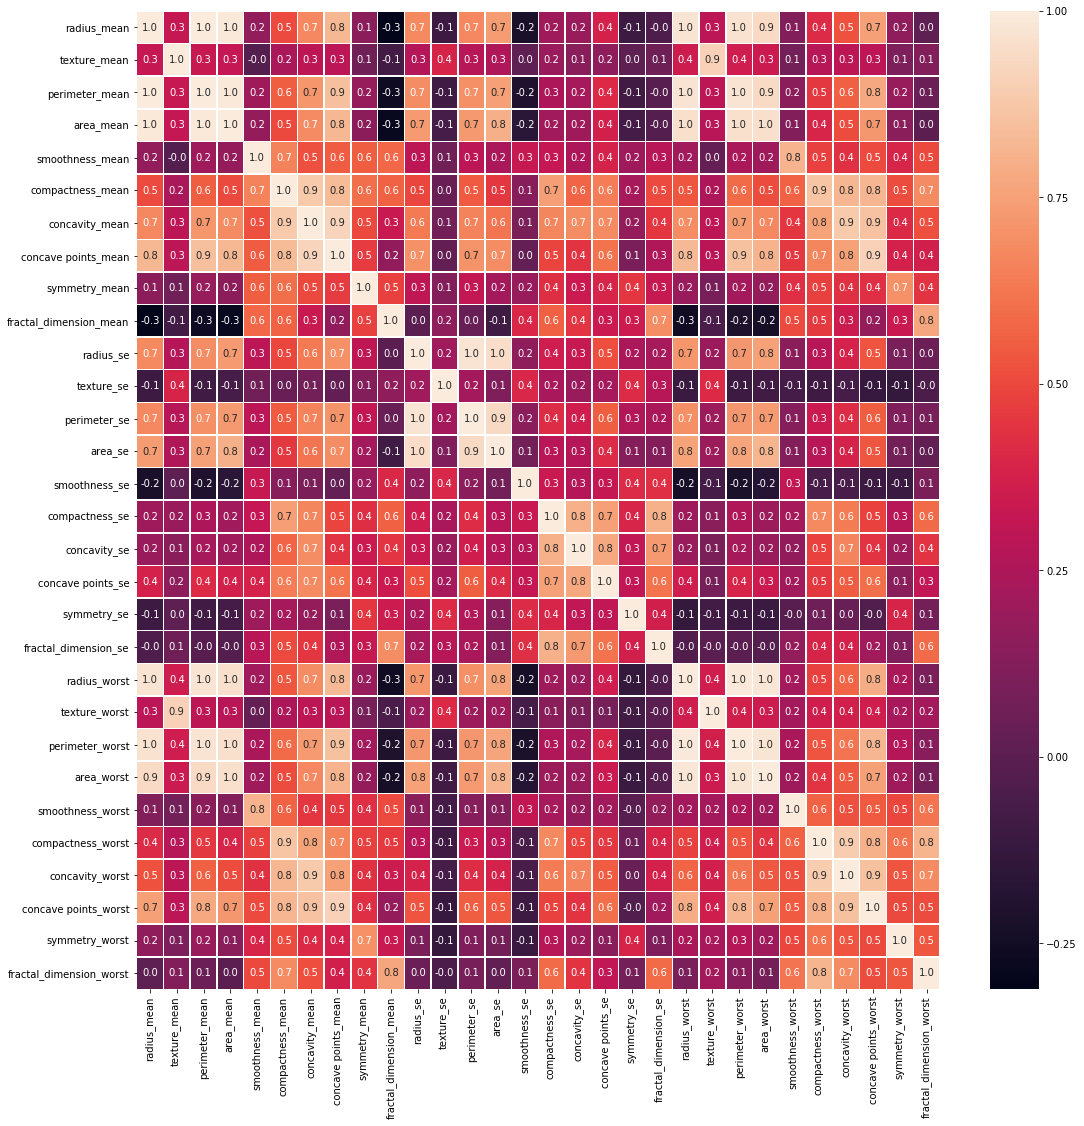

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [18]:
# The features  with high correlation with other features are: (threshold = 90%)
high_corr_pts = X[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]

Text(0.5, 1.0, 'Radius mean wrt Diagnosis')

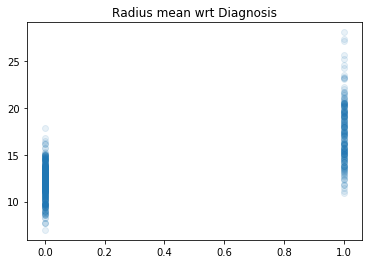

In [19]:
plt.scatter(df.diagnosis, df.radius_mean, alpha=0.1)
# here the plot has to be transparent so we need to pick low alpha value
plt.title("Radius mean wrt Diagnosis")

Text(0.5, 1.0, 'Perimeter mean wrt Diagnosis')

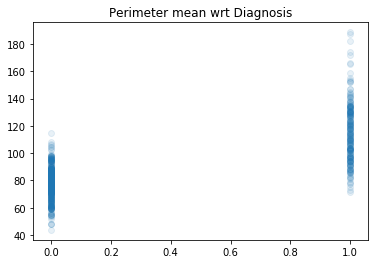

In [20]:
plt.scatter(df.diagnosis, df.perimeter_mean, alpha=0.1)
# here the plot has to be transparent so we need to pic low alpha value
plt.title("Perimeter mean wrt Diagnosis")

Text(0.5, 1.0, 'Radius worst wrt Diagnosis')

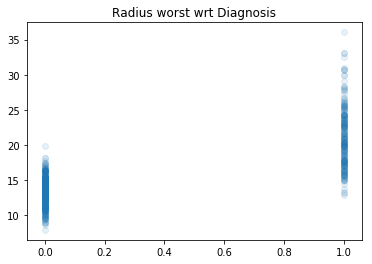

In [21]:
plt.scatter(y, X["radius_worst"], alpha=0.1)
# here the plot has to be transparent so we need to pic low alpha value
plt.title("Radius worst wrt Diagnosis")

Text(0.5, 1.0, 'Area mean wrt Diagnosis')

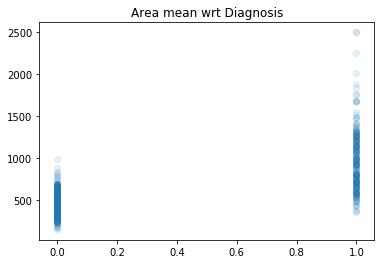

In [22]:
plt.scatter(df.diagnosis, df.area_mean, alpha=0.1)
# here the plot has to be transparent so we need to pic low alpha value
plt.title("Area mean wrt Diagnosis")

Text(0.5, 1.0, 'Perimeter worst wrt Diagnosis')

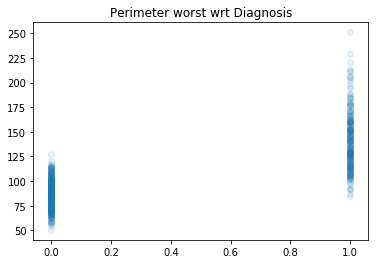

In [23]:
plt.scatter(df.diagnosis, df.perimeter_worst, alpha=0.1)
# here the plot has to be transparent so we need to pic low alpha value
plt.title("Perimeter worst wrt Diagnosis")

In [24]:
# Splitting data with 40% test data and rest 60% is training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

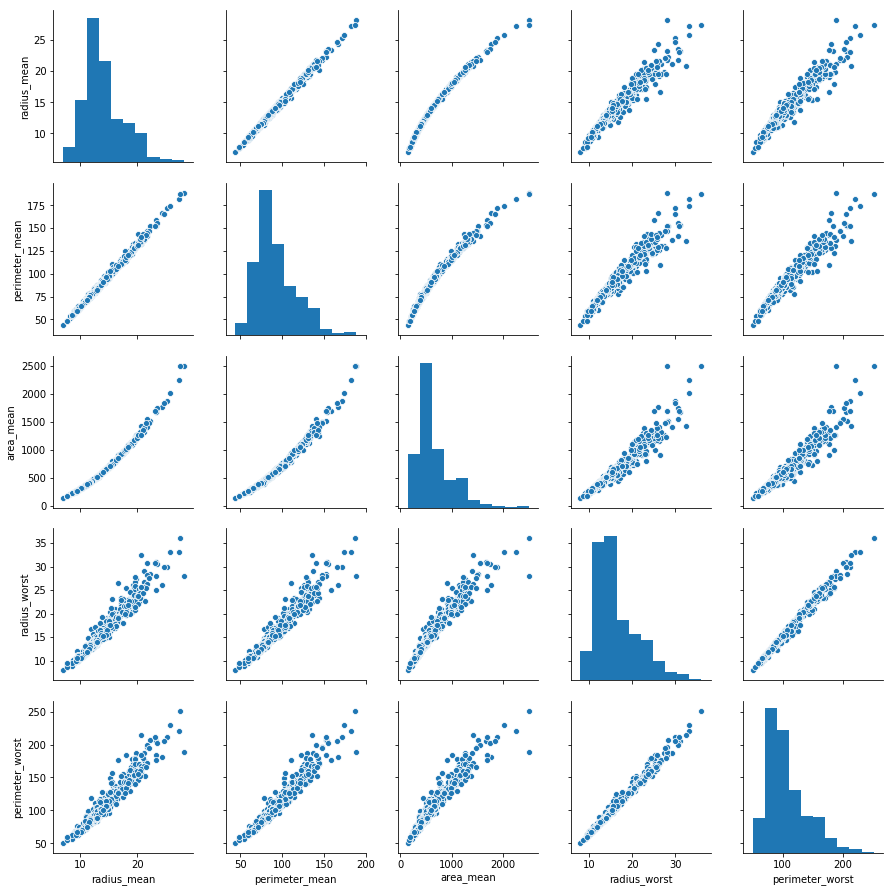

In [25]:
# Pair plot for high correlational features
sns.pairplot(high_corr_pts)

In [26]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
high_corr_pts.head()

,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst
0,17.99,122.80,1001.0,25.38,184.60
1,20.57,132.90,1326.0,24.99,158.80
2,19.69,130.00,1203.0,23.57,152.50
3,11.42,77.58,386.1,14.91,98.87
4,20.29,135.10,1297.0,22.54,152.20


In [28]:
X.corr()["radius_mean"]

radius_mean                1.000000
texture_mean               0.323782
perimeter_mean             0.997855
area_mean                  0.987357
smoothness_mean            0.170581
compactness_mean           0.506124
concavity_mean             0.676764
concave points_mean        0.822529
symmetry_mean              0.147741
fractal_dimension_mean    -0.311631
radius_se                  0.679090
texture_se                -0.097317
perimeter_se               0.674172
area_se                    0.735864
smoothness_se             -0.222600
compactness_se             0.206000
concavity_se               0.194204
concave points_se          0.376169
symmetry_se               -0.104321
fractal_dimension_se      -0.042641
radius_worst               0.969539
texture_worst              0.297008
perimeter_worst            0.965137
area_worst                 0.941082
smoothness_worst           0.119616
compactness_worst          0.413463
concavity_worst            0.526911
concave points_worst       0

In [29]:
# import Xtreme Gradient Boosting
import xgboost as xgb

In [30]:
# Load classifier in model_all (considering all features)
model_all = xgb.XGBClassifier()

In [31]:
# Training model
model_all.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [32]:
# Predict based on all testing features
pred = model_all.predict(X_test)

In [33]:
# Get accuracy of model
accuracy_score(y_test,pred)

0.9517543859649122

In [35]:
# Precision, Recall, F1-score, Support for 'M' and 'B' (0 and 1) of target variable
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       149
           1       0.94      0.92      0.93        79

   micro avg       0.95      0.95      0.95       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228



In [36]:
# True Positive, True Negative, False Positive, False Negative
confusion_matrix(y_test,pred)

array([[144,   5],
       [  6,  73]])

In [37]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf = xgb.XGBClassifier()
rfecv = RFECV(estimator=clf, step=1, cv=4,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 11
Best features : Index(['concave points_mean', 'area_se', 'compactness_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


We find best 11 features that are texture_mean, area_mean, concavity_mean, texture_se, area_se, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst and fractal_dimension_worst for best classification. 

## Feature selection and understanding data

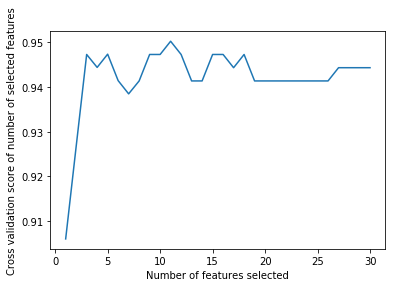

In [38]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [39]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
importances = (model_all.feature_importances_)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 21 (0.153439)
2. feature 23 (0.108466)
3. feature 7 (0.100529)
4. feature 27 (0.092593)
5. feature 13 (0.071429)
6. feature 28 (0.060847)
7. feature 26 (0.052910)
8. feature 20 (0.052910)
9. feature 1 (0.037037)
10. feature 22 (0.034392)
11. feature 24 (0.026455)
12. feature 15 (0.023810)
13. feature 18 (0.021164)
14. feature 4 (0.018519)
15. feature 19 (0.018519)
16. feature 6 (0.015873)
17. feature 16 (0.013228)
18. feature 12 (0.013228)
19. feature 9 (0.013228)
20. feature 3 (0.010582)
21. feature 25 (0.010582)
22. feature 29 (0.007937)
23. feature 0 (0.007937)
24. feature 10 (0.007937)
25. feature 11 (0.007937)
26. feature 8 (0.005291)
27. feature 5 (0.005291)
28. feature 17 (0.005291)
29. feature 14 (0.002646)
30. feature 2 (0.000000)


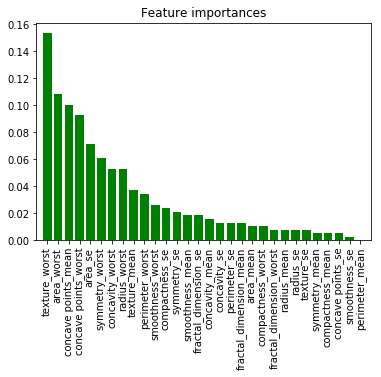

In [40]:
# plot
plt.title("Feature importances")

plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", align="center")

plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
plt.show()

In [99]:
X_train_optimal = X_train[['texture_mean', 'concave points_mean', 'area_se', 'compactness_se',
       'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst']]
X_test_optimal = X_test[['texture_mean', 'concave points_mean', 'area_se', 'compactness_se',
       'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst']]
# Load classifier in model_optimal (considering all optimal features)
model_optimal = xgb.XGBClassifier()
# Training model
model_optimal.fit(X_train_optimal,y_train)
# Predict based on all testing features
pred = model_optimal.predict(X_test_optimal)
# Get accuracy of model
accuracy_score(y_test,pred)

0.9649122807017544